EDA FOR RISK FACTORS PREDICTION  DATASET FOR CKD AND CHRONIC KIDNEY DISEASE DATASET

In [1]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 66.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fec3d74eb2b01b06fab82d9be9879d620d7be181e4d2e3d664140c72ec570cdd
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from ydata_profiling import ProfileReport

In [3]:
# REad Risk FACTOr Predictions of Chronic Kidney Disease Dataset
RCKD = pd.read_csv('ckd-dataset-v2.csv')


In [4]:
# Look at first 5 rows of dataset
display(RCKD.head())

# Look at last 5 rows of dataset
display(RCKD.tail())

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12


,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
197,1,2,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,1,1,0,0,0,1,26.6175 - 51.7832,s3,1,≥ 74
198,0,0,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,0,1,0,0,0,1,< 26.6175,s4,1,≥ 74
199,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,51.7832 - 76.949,s2,0,≥ 74
200,1,1,≥ 1.023,< 0,notckd,0,< 0,0,0,0,...,0,0,0,0,0,0,102.115 - 127.281,s1,0,≥ 74
201,1,1,1.009 - 1.011,2 - 2,ckd,0,2 - 2,0,0,0,...,1,1,0,0,0,0,< 26.6175,s4,1,≥ 74


In [5]:
RCKD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bp (Diastolic)  201 non-null    object
 1   bp limit        201 non-null    object
 2   sg              201 non-null    object
 3   al              201 non-null    object
 4   class           201 non-null    object
 5   rbc             201 non-null    object
 6   su              201 non-null    object
 7   pc              201 non-null    object
 8   pcc             201 non-null    object
 9   ba              201 non-null    object
 10  bgr             201 non-null    object
 11  bu              201 non-null    object
 12  sod             201 non-null    object
 13  sc              201 non-null    object
 14  pot             201 non-null    object
 15  hemo            201 non-null    object
 16  pcv             201 non-null    object
 17  rbcc            201 non-null    object
 18  wbcc      

In [6]:
#Summary Statistics
RCKD.describe()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
count,201,201,201,201,201,201,201,201,201,201,...,201,201,201,201,201,201,201,201,202,202
unique,3,4,6,6,3,3,7,3,3,3,...,3,3,3,3,3,3,12,6,4,12
top,1,0,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,< 26.6175,s1,1,59 - 66
freq,108,95,75,116,128,175,170,155,173,189,...,122,130,178,160,165,168,68,54,128,48


In [7]:
!pip install pingouin==0.5.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.9 MB/s eta 0:00:00


In [92]:
#sum of missing data per column
RCKD.isnull().sum()

,0
bp (Diastolic),0
bp limit,0
sg,0
al,0
class,0
rbc,0
su,0
pc,0
pcc,0
ba,0


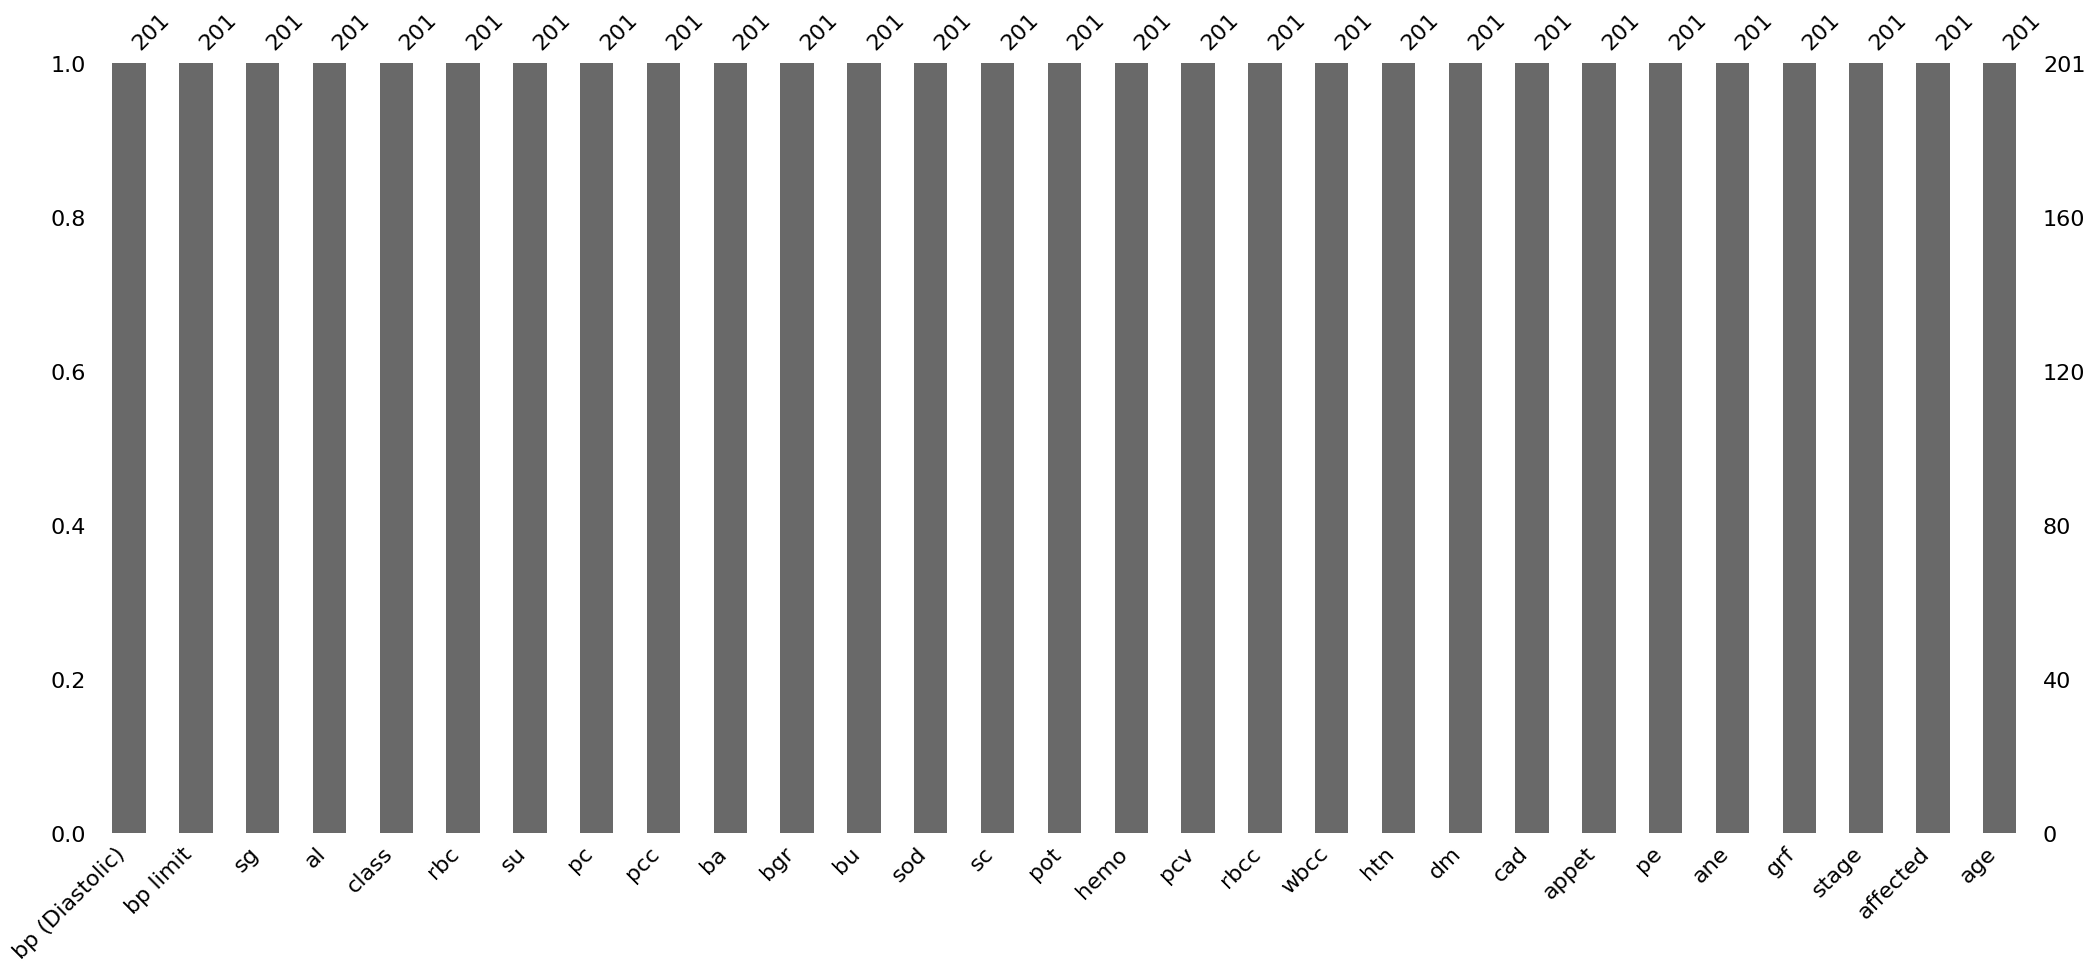

In [86]:
## Check missingness bar chart
msno.bar(RCKD);

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


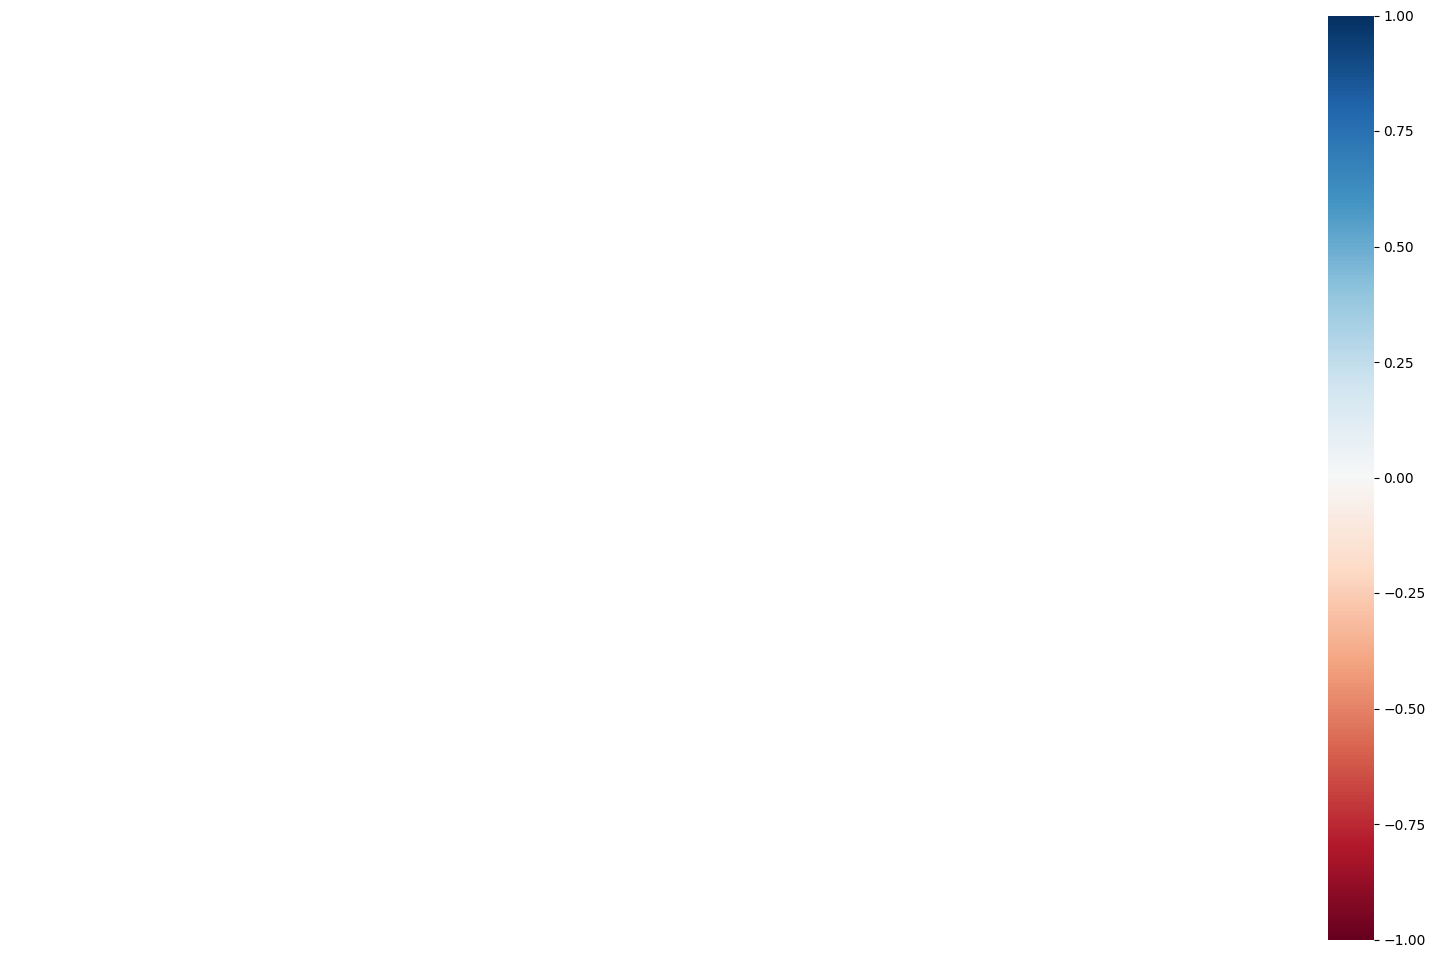

In [87]:
msno.heatmap(RCKD);

<Figure size 1000x600 with 0 Axes>

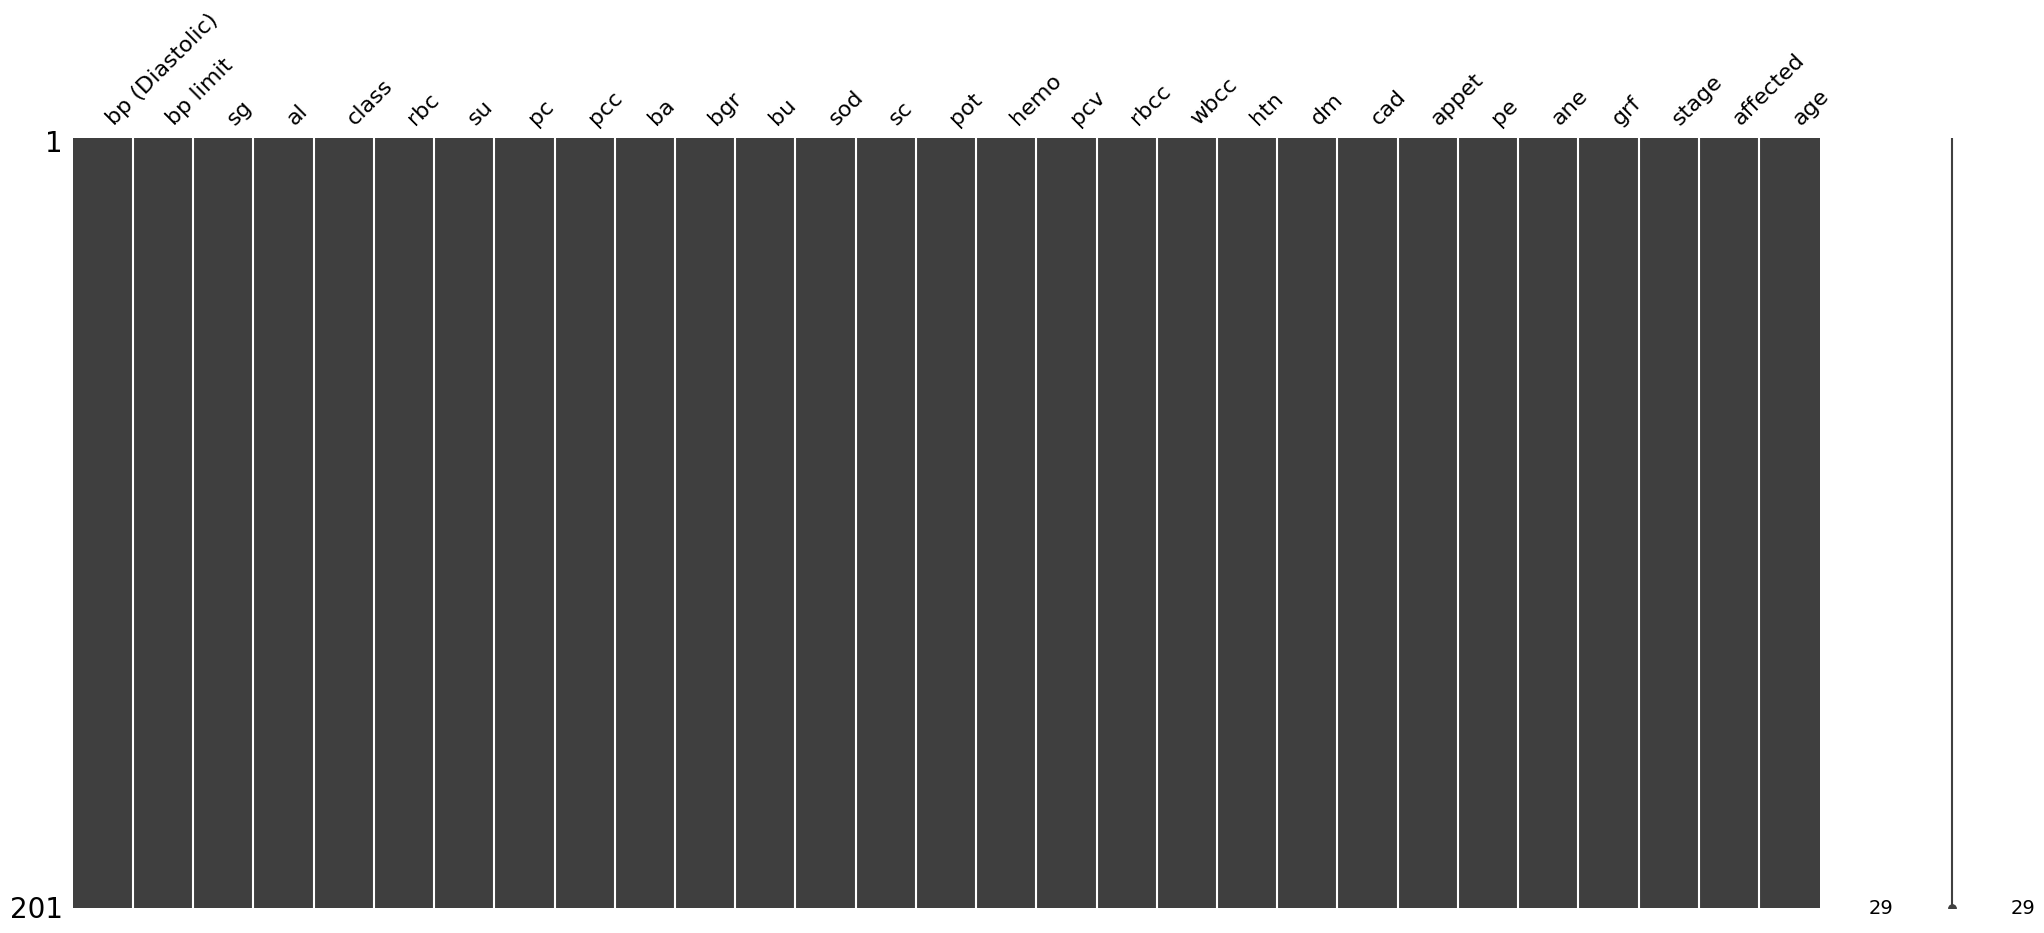

In [88]:
# Visualize missing values
plt.figure(figsize=(10, 6))
msno.matrix(RCKD)
plt.show()

I dropped all the values in rows containing missing values because the row containing missing values is row 1. The Value for affected is class and age meta.

In [89]:
RCKD = RCKD.dropna(axis = 0, how ='any')
print(RCKD.isnull().sum())
RCKD.shape

bp (Diastolic)    0
bp limit          0
sg                0
al                0
class             0
rbc               0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sod               0
sc                0
pot               0
hemo              0
pcv               0
rbcc              0
wbcc              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
grf               0
stage             0
affected          0
age               0
dtype: int64


(201, 29)

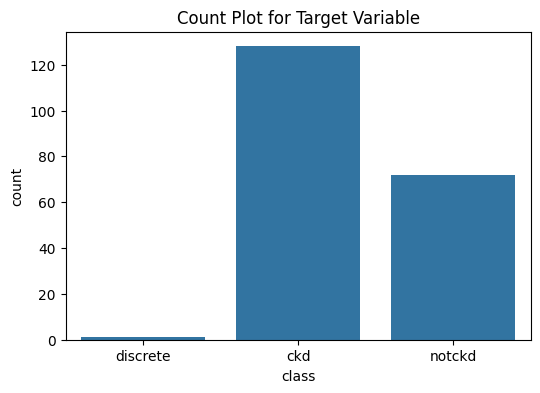

In [13]:
# Count plot for target variable (if available, e.g., 'class' for classification problems)
if 'class' in RCKD.columns:  # Adjust 'class' to match your target column
    plt.figure(figsize=(6, 4))
    sns.countplot(x='class', data=RCKD)
    plt.title("Count Plot for Target Variable")
    plt.show()

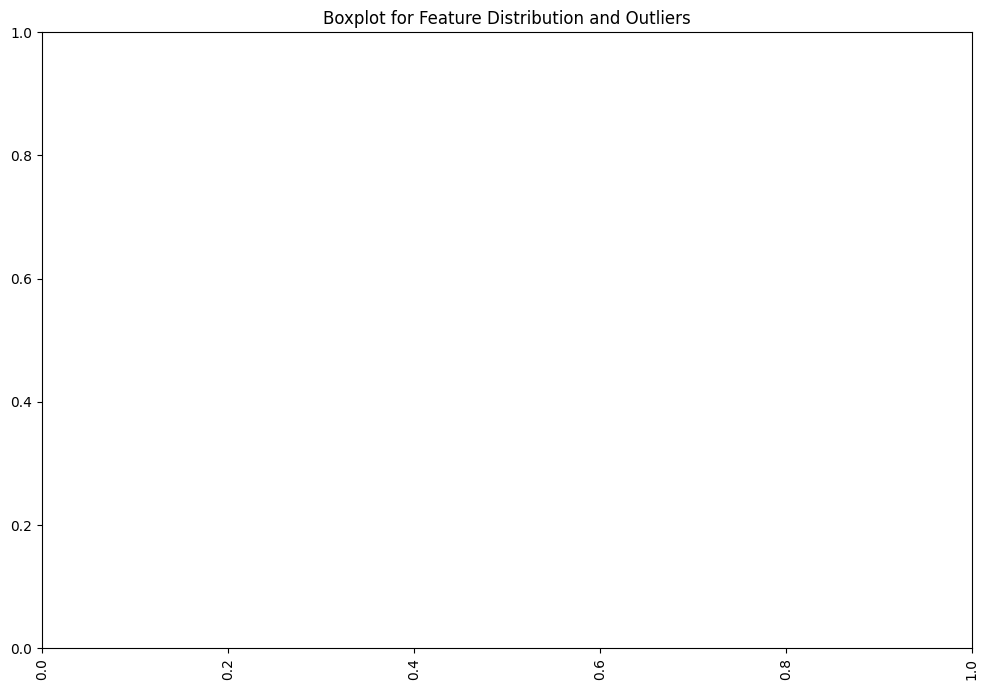

In [14]:
#Boxplot for detecting outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=RCKD, palette="Set2")
plt.title("Boxplot for Feature Distribution and Outliers")
plt.xticks(rotation=90)
plt.show()

In [15]:
pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.6 MB/s eta 0:00:00


In [16]:
# Generate the profile report
#profile = ProfileReport(RCKD, title="My Profiling Report")

# Display the report in a Jupyter Notebook
#profile.to_notebook_iframe()


In [17]:
RCKD.count()

,0
bp (Diastolic),201
bp limit,201
sg,201
al,201
class,201
rbc,201
su,201
pc,201
pcc,201
ba,201


In [18]:
RCKD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 201
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bp (Diastolic)  201 non-null    object
 1   bp limit        201 non-null    object
 2   sg              201 non-null    object
 3   al              201 non-null    object
 4   class           201 non-null    object
 5   rbc             201 non-null    object
 6   su              201 non-null    object
 7   pc              201 non-null    object
 8   pcc             201 non-null    object
 9   ba              201 non-null    object
 10  bgr             201 non-null    object
 11  bu              201 non-null    object
 12  sod             201 non-null    object
 13  sc              201 non-null    object
 14  pot             201 non-null    object
 15  hemo            201 non-null    object
 16  pcv             201 non-null    object
 17  rbcc            201 non-null    object
 18  wbcc           

Chronic Kidney Disease dataset
Conversion attempt  from RAR to CSV

In [19]:
!pip install rarfile
#!sudo apt-get install unrar


In [20]:
import pandas as pd

In [21]:
pip install rarfile

In [22]:
import rarfile, csv
rar_path = rarfile.RarFile("Chronic_Kidney_Disease.rar")
csv_file_name = "Chronic_Kidney_Disease.csv"
#rar_file = rarfile.RarFile.open(rar_path, csv_file_name)
#csv_reader = csv.reader(rar_file, delimiter=',')

In [23]:
rar_path

In [24]:
csv_file_name

'Chronic_Kidney_Disease.csv'

In [25]:
#First code I used to open the Chronic Kidney Disease rar file. I recived an code error
#rar_file = rarfile.RarFile.open(rar_path, csv_file_name)

In [26]:
#Second attempt code used to open the RAR file that i recived an error.
#import rarfile
#import os

# Path to your .rar file
#rar_path = 'Chronic_Kidney_Disease.rar'
#extract_dir = 'path/to/extracted/files/'

# Open and extract the .rar file
#with rarfile.RarFile(rar_path) as rf:
#rf.extractall(extract_dir)

# List files in the directory
#os.listdir(extract_dir)


Upon investigation, It was discovering the RAR File would not open due to there where 3 files located in the orginal file. Therefore the file that was choosen was to perform project wa the targe and features file

In [27]:
pip install ucimlrepo

In [28]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
feature = chronic_kidney_disease.data.features
target = chronic_kidney_disease.data.targets

# metadata
#print(chronic_kidney_disease.metadata)

# variable information
#print(chronic_kidney_disease.variables)


In [29]:
feature

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,15.7,47.0,6700.0,4.9,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,16.5,54.0,7800.0,6.2,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,15.8,49.0,6600.0,5.4,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,14.2,51.0,7200.0,5.9,no,no,no,good,no,no


In [30]:
target

,class
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


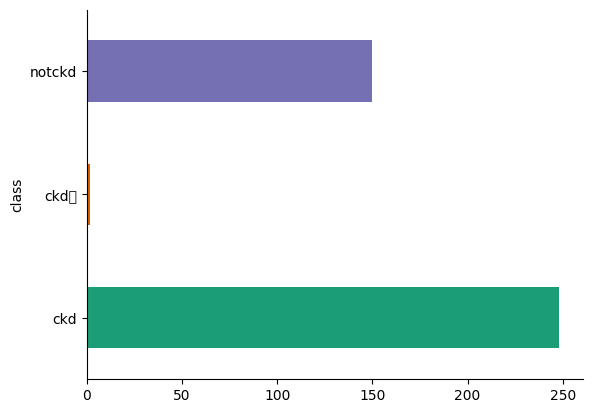

In [31]:
# @title class

from matplotlib import pyplot as plt
import seaborn as sns
target.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [32]:
#Combine the target and feature
df = pd.concat([feature, target], axis =1)

In [33]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [34]:
df['class'].value_counts()

,count
class,
ckd,248
notckd,150
ckd\t,2


In [35]:
df['bu'].value_counts()

,count
bu,
46.0,15
25.0,13
19.0,11
40.0,10
50.0,9
...,...
176.0,1
145.0,1
92.0,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [37]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [38]:
df.isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4
bgr,44


In [39]:
df.dropna(
    axis=0,
    how='any',
    subset=None,
    inplace=True
)

In [40]:
df.isnull().sum()

,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0
bgr,0


MERGING Risk PREDICITION DATAFRAME(RCKD)with DF( Chromic Kidney Disease ** I will merge by the based on specfic variables that are the same .

In [41]:
!pip install seaborn
import seaborn as sns

In [42]:
# Get the common columns between the two DataFrames
common_cols = list(set(RCKD.columns) & set(df.columns))
print(common_cols)


['hemo', 'rbc', 'al', 'pcv', 'htn', 'sod', 'ane', 'age', 'rbcc', 'bu', 'wbcc', 'pc', 'sg', 'pcc', 'sc', 'class', 'su', 'appet', 'bgr', 'cad', 'pe', 'dm', 'ba', 'pot']


In [43]:
#convert_dtypes() objects to numeric
RCKD_numeric = df.convert_dtypes(infer_objects=True, convert_string=True)

In [44]:
#convert_dtypes() objects to numeric
df_numeric = df.convert_dtypes(infer_objects=True, convert_string=True)

In [45]:
# Get the common columns between the two DataFrames
common_cols = list(set(RCKD_numeric.columns) & set(df_numeric.columns))


In [46]:
# Print the common columns to verify they are the intended ones
print(f"Common columns: {common_cols}")

Common columns: ['hemo', 'rbc', 'al', 'pcv', 'htn', 'sod', 'ane', 'age', 'rbcc', 'bu', 'wbcc', 'pc', 'sg', 'pcc', 'bp', 'sc', 'class', 'su', 'appet', 'bgr', 'cad', 'pe', 'dm', 'ba', 'pot']


In [47]:

# Merge the DataFrames using only the common columns
merged_df = pd.merge(RCKD_numeric, df_numeric, on=common_cols, how='outer')

In [48]:
merged_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,56,90,1.01,4,1,normal,abnormal,present,notpresent,176,...,9,5400,2.1,yes,yes,no,poor,yes,yes,ckd
1,68,80,1.01,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
2,59,70,1.01,3,0,normal,abnormal,notpresent,notpresent,76,...,22,3800,2.1,yes,no,no,poor,yes,yes,ckd
3,59,100,1.015,4,2,normal,normal,notpresent,notpresent,255,...,20,9800,3.9,yes,yes,yes,good,no,yes,ckd
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


In [49]:
merged_df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [50]:
merged_df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,158.0,158.0,158.0,158.0,158.0,158.0,158.0,158.0,158.0,158.0,158.0,158.0,158.0,158.0
mean,49.563291,74.050633,1.019873,0.797468,0.253165,131.341772,52.575949,2.188608,138.848101,4.636709,13.687342,41.917722,8475.949367,4.891772
std,15.512244,11.175381,0.005499,1.41313,0.813397,64.939832,47.395382,3.077615,7.489421,3.476351,2.882204,9.105164,3126.880181,1.019364
min,6.0,50.0,1.005,0.0,0.0,70.0,10.0,0.4,111.0,2.5,3.1,9.0,3800.0,2.1
25%,39.25,60.0,1.02,0.0,0.0,97.0,26.0,0.7,135.0,3.7,12.6,37.5,6525.0,4.5
50%,50.5,80.0,1.02,0.0,0.0,115.5,39.5,1.1,139.0,4.5,14.25,44.0,7800.0,4.95
75%,60.0,80.0,1.025,1.0,0.0,131.75,49.75,1.6,144.0,4.9,15.775,48.0,9775.0,5.6
max,83.0,110.0,1.025,4.0,5.0,490.0,309.0,15.2,150.0,47.0,17.8,54.0,26400.0,8.0


In [51]:
#import pandas as pd

# Calculate mean and standard deviation only for numeric columns
#mean = merged_df.select_dtypes(include=['number']).mean()
#std = merged_df.select_dtypes(include=['number']).std()

# Calculate z-scores for each data point in numeric columns
#numeric_cols = merged_df.select_dtypes(include=['number'])
#z_scores = (numeric_cols - mean) / std

# Identify potential outliers
#outliers = numeric_cols[z_scores > 3]

# Display outliers without dtype information
#print(outliers.to_string())

In [52]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     158 non-null    Int64  
 1   bp      158 non-null    Int64  
 2   sg      158 non-null    Float64
 3   al      158 non-null    Int64  
 4   su      158 non-null    Int64  
 5   rbc     158 non-null    string 
 6   pc      158 non-null    string 
 7   pcc     158 non-null    string 
 8   ba      158 non-null    string 
 9   bgr     158 non-null    Int64  
 10  bu      158 non-null    Int64  
 11  sc      158 non-null    Float64
 12  sod     158 non-null    Int64  
 13  pot     158 non-null    Float64
 14  hemo    158 non-null    Float64
 15  pcv     158 non-null    Int64  
 16  wbcc    158 non-null    Int64  
 17  rbcc    158 non-null    Float64
 18  htn     158 non-null    string 
 19  dm      158 non-null    string 
 20  cad     158 non-null    string 
 21  appet   158 non-null    string 
 22  pe

In [53]:
new_var = merged_df.isnull().sum()
new_var

,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0
bgr,0


In [54]:
merged_df.shape

(158, 25)

Hot Coding

In [55]:
merged_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,56,90,1.01,4,1,normal,abnormal,present,notpresent,176,...,9,5400,2.1,yes,yes,no,poor,yes,yes,ckd
1,68,80,1.01,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
2,59,70,1.01,3,0,normal,abnormal,notpresent,notpresent,76,...,22,3800,2.1,yes,no,no,poor,yes,yes,ckd
3,59,100,1.015,4,2,normal,normal,notpresent,notpresent,255,...,20,9800,3.9,yes,yes,yes,good,no,yes,ckd
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,29,80,1.02,0,0,normal,normal,notpresent,notpresent,83,...,40,9900,4.7,no,no,no,good,no,no,notckd
154,28,60,1.025,0,0,normal,normal,notpresent,notpresent,79,...,51,6500,5.0,no,no,no,good,no,no,notckd
155,23,80,1.02,0,0,normal,normal,notpresent,notpresent,99,...,46,4300,5.5,no,no,no,good,no,no,notckd
156,43,60,1.025,0,0,normal,normal,notpresent,notpresent,108,...,43,7200,5.5,no,no,no,good,no,no,notckd


In [56]:
merged_df = pd.concat([merged_df, pd.get_dummies(merged_df['appet'], prefix='appet', drop_first=True)], axis=1)


In [57]:
merged_df = pd.concat([merged_df, pd.get_dummies(merged_df['ba'], prefix='ba', drop_first=True)], axis=1)

In [58]:
merged_df = pd.concat([merged_df, pd.get_dummies(merged_df['pcc'], prefix='pcc', drop_first=True)], axis=1)

In [59]:
merged_df = pd.concat([merged_df, pd.get_dummies(merged_df['pc'], prefix='pc', drop_first=True)], axis=1)

In [60]:
merged_df = pd.concat([merged_df, pd.get_dummies(merged_df['rbc'], prefix='rbc', drop_first=True)], axis=1)

In [61]:
merged_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,cad,appet,pe,ane,class,appet_poor,ba_present,pcc_present,pc_normal,rbc_normal
0,56,90,1.01,4,1,normal,abnormal,present,notpresent,176,...,no,poor,yes,yes,ckd,True,False,True,False,True
1,68,80,1.01,3,2,normal,abnormal,present,present,157,...,yes,poor,yes,no,ckd,True,True,True,False,True
2,59,70,1.01,3,0,normal,abnormal,notpresent,notpresent,76,...,no,poor,yes,yes,ckd,True,False,False,False,True
3,59,100,1.015,4,2,normal,normal,notpresent,notpresent,255,...,yes,good,no,yes,ckd,False,False,False,True,True
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,yes,poor,yes,yes,ckd,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,29,80,1.02,0,0,normal,normal,notpresent,notpresent,83,...,no,good,no,no,notckd,False,False,False,True,True
154,28,60,1.025,0,0,normal,normal,notpresent,notpresent,79,...,no,good,no,no,notckd,False,False,False,True,True
155,23,80,1.02,0,0,normal,normal,notpresent,notpresent,99,...,no,good,no,no,notckd,False,False,False,True,True
156,43,60,1.025,0,0,normal,normal,notpresent,notpresent,108,...,no,good,no,no,notckd,False,False,False,True,True


In [62]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          158 non-null    Int64  
 1   bp           158 non-null    Int64  
 2   sg           158 non-null    Float64
 3   al           158 non-null    Int64  
 4   su           158 non-null    Int64  
 5   rbc          158 non-null    string 
 6   pc           158 non-null    string 
 7   pcc          158 non-null    string 
 8   ba           158 non-null    string 
 9   bgr          158 non-null    Int64  
 10  bu           158 non-null    Int64  
 11  sc           158 non-null    Float64
 12  sod          158 non-null    Int64  
 13  pot          158 non-null    Float64
 14  hemo         158 non-null    Float64
 15  pcv          158 non-null    Int64  
 16  wbcc         158 non-null    Int64  
 17  rbcc         158 non-null    Float64
 18  htn          158 non-null    string 
 19  dm      

In [63]:
merged_df = merged_df.drop(columns=['appet_poor', 'ba_present', 'pcc_present', 'pc_normal', 'rbc_normal'])
merged_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,56,90,1.01,4,1,normal,abnormal,present,notpresent,176,...,9,5400,2.1,yes,yes,no,poor,yes,yes,ckd
1,68,80,1.01,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
2,59,70,1.01,3,0,normal,abnormal,notpresent,notpresent,76,...,22,3800,2.1,yes,no,no,poor,yes,yes,ckd
3,59,100,1.015,4,2,normal,normal,notpresent,notpresent,255,...,20,9800,3.9,yes,yes,yes,good,no,yes,ckd
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,29,80,1.02,0,0,normal,normal,notpresent,notpresent,83,...,40,9900,4.7,no,no,no,good,no,no,notckd
154,28,60,1.025,0,0,normal,normal,notpresent,notpresent,79,...,51,6500,5.0,no,no,no,good,no,no,notckd
155,23,80,1.02,0,0,normal,normal,notpresent,notpresent,99,...,46,4300,5.5,no,no,no,good,no,no,notckd
156,43,60,1.025,0,0,normal,normal,notpresent,notpresent,108,...,43,7200,5.5,no,no,no,good,no,no,notckd


Univariate EDA







In [64]:
# DataFrame
df = pd.DataFrame({"class": ["Yes", "No", "Yes", "No", "Yes"]})

# Check unique values
unique_classes = merged_df['class'].unique()
print(f"Unique classes: {unique_classes}")
print(f"Number of unique classes: {len(unique_classes)}")


Unique classes: <StringArray>
['ckd', 'notckd']
Length: 2, dtype: string
Number of unique classes: 2


In [65]:
numerical_features = merged_df.select_dtypes(include=np.number).columns
correlation_matrix = merged_df[numerical_features].corr()

# Display the correlation matrix
print(correlation_matrix)

           age        bp        sg        al        su       bgr        bu  \
age   1.000000  0.079712 -0.277303  0.253380  0.207711  0.301915  0.190636   
bp    0.079712  1.000000 -0.198897  0.322507  0.243828  0.190113  0.316287   
sg   -0.277303 -0.198897  1.000000 -0.712331 -0.448477 -0.544781 -0.545319   
al    0.253380  0.322507 -0.712331  1.000000  0.521448  0.518123  0.661940   
su    0.207711  0.243828 -0.448477  0.521448  1.000000  0.730050  0.312259   
bgr   0.301915  0.190113 -0.544781  0.518123  0.730050  1.000000  0.326496   
bu    0.190636  0.316287 -0.545319  0.661940  0.312259  0.326496  1.000000   
sc    0.189721  0.386551 -0.563122  0.702889  0.347196  0.331284  0.896094   
sod  -0.102933 -0.224710  0.539285 -0.599334 -0.242491 -0.284968 -0.492778   
pot   0.006866  0.127801 -0.075057  0.209492  0.271954  0.102226  0.245427   
hemo -0.245645 -0.282365  0.682086 -0.784745 -0.385511 -0.434158 -0.712196   
pcv  -0.235116 -0.353504  0.678472 -0.775528 -0.404821 -0.443818

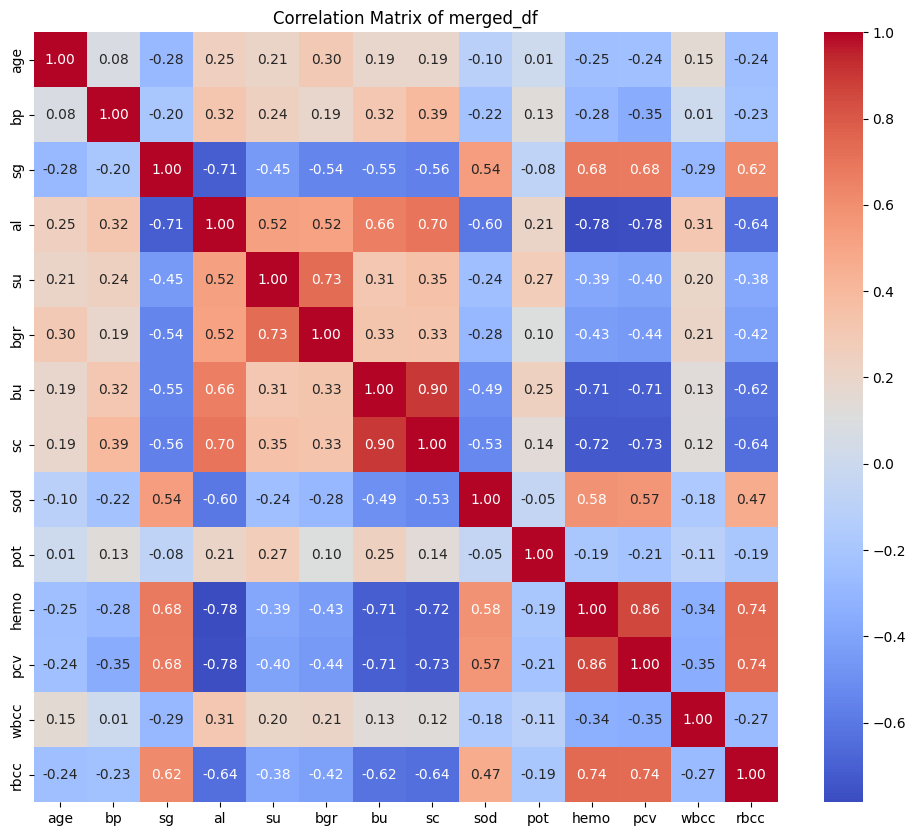

In [66]:
# Calculate the correlation matrix
correlation_matrix = merged_df[numerical_features].corr()

#correlation_matrix = merged_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of merged_df')
plt.show()

Observing Coorelation though visualization


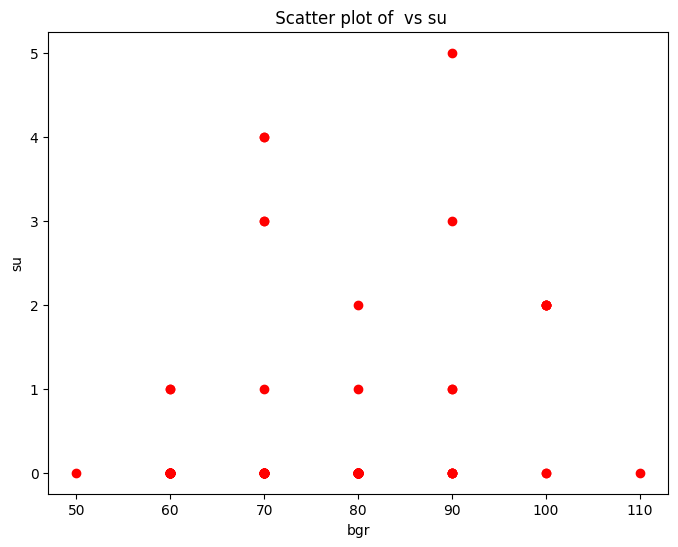

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Bp (blood gkucose Random) VS su (Sugar)
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['bp'], merged_df['su'], color='red')
plt.xlabel('bgr')
plt.ylabel('su')
plt.title(' Scatter plot of  vs su')
plt.show()

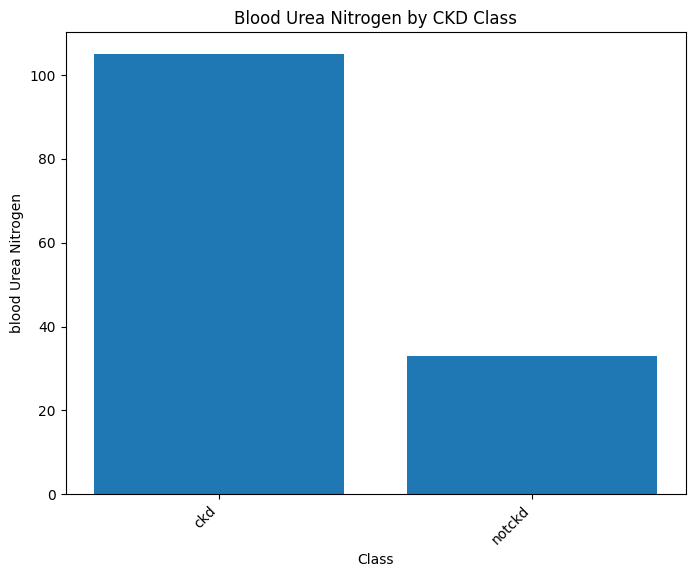

In [68]:


category_means = merged_df.groupby('class')['bu'].mean()

plt.figure(figsize=(8, 6))
plt.bar(category_means.index, category_means.values)
plt.xlabel('Class')
plt.ylabel('blood Urea Nitrogen')
plt.title('Blood Urea Nitrogen by CKD Class')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

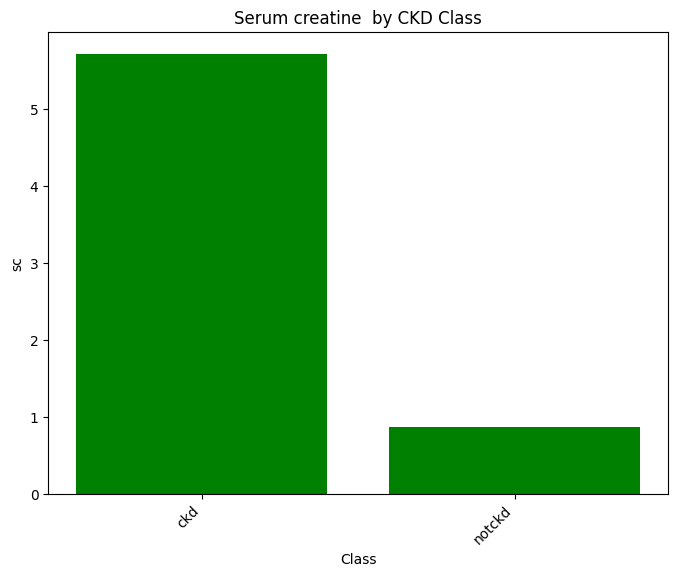

In [69]:
category_means = merged_df.groupby('class')['sc'].mean()

plt.figure(figsize=(8, 6))
plt.bar(category_means.index, category_means.values, color='green')
plt.xlabel('Class')
plt.ylabel('sc')
plt.title('Serum creatine  by CKD Class')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

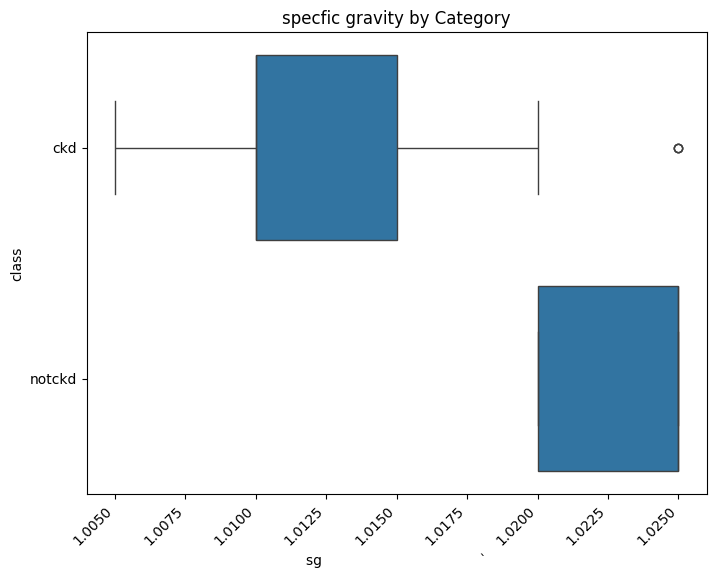

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.boxplot(x='sg', y='class', data=merged_df)
plt.xlabel('sg                                    `')
plt.ylabel('class')
plt.title('specfic gravity by Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

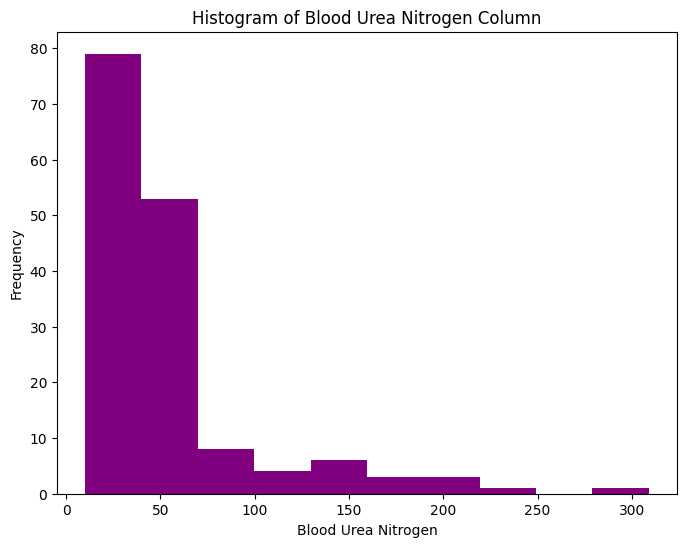

In [71]:
import matplotlib.pyplot as plt



plt.figure(figsize=(8, 6))
plt.hist(merged_df['bu'], bins=10, color='purple')
plt.xlabel('Blood Urea Nitrogen')
plt.ylabel('Frequency')
plt.title('Histogram of Blood Urea Nitrogen Column')
plt.show()

Identify and drop  high Correlation variables ( multivariate relationships ) to simplfy future models  

In [72]:
# Identify correlations above the threshold
threshold = 0.7
corr_matrix = merged_df[numerical_features].corr().abs()

# Find variable pairs with correlation above the threshold
high_corr_pairs = [
    (col1, col2)
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if col1 != col2 and corr_matrix.loc[col1, col2] > threshold
]
print(high_corr_pairs)


[('sg', 'al'), ('al', 'sg'), ('al', 'sc'), ('al', 'hemo'), ('al', 'pcv'), ('su', 'bgr'), ('bgr', 'su'), ('bu', 'sc'), ('bu', 'hemo'), ('bu', 'pcv'), ('sc', 'al'), ('sc', 'bu'), ('sc', 'hemo'), ('sc', 'pcv'), ('hemo', 'al'), ('hemo', 'bu'), ('hemo', 'sc'), ('hemo', 'pcv'), ('hemo', 'rbcc'), ('pcv', 'al'), ('pcv', 'bu'), ('pcv', 'sc'), ('pcv', 'hemo'), ('pcv', 'rbcc'), ('rbcc', 'hemo'), ('rbcc', 'pcv')]


In [73]:
# Drop one variable from each correlated pair
variables_to_drop = []
for col1, col2 in high_corr_pairs:
    if col1 not in variables_to_drop and col2 not in variables_to_drop:
        variables_to_drop.append(col2)  # Arbitrarily drop col2

print(f"Variables to drop: {variables_to_drop}")


Variables to drop: ['al', 'bgr', 'sc', 'hemo', 'pcv']


In [74]:
merged_df_simplified = merged_df.drop(columns=variables_to_drop)
print(merged_df_simplified.head())


   age   bp     sg  su       rbc        pc         pcc          ba   bu  sod  \
0   56   90   1.01   1    normal  abnormal     present  notpresent  309  124   
1   68   80   1.01   2    normal  abnormal     present     present   90  130   
2   59   70   1.01   0    normal  abnormal  notpresent  notpresent  186  135   
3   59  100  1.015   2    normal    normal  notpresent  notpresent  132  135   
4   61   80  1.015   0  abnormal  abnormal  notpresent  notpresent  148  135   

   pot   wbcc  rbcc  htn   dm  cad appet   pe  ane class  
0  6.5   5400   2.1  yes  yes   no  poor  yes  yes   ckd  
1  6.4  11000   2.6  yes  yes  yes  poor  yes   no   ckd  
2  7.6   3800   2.1  yes   no   no  poor  yes  yes   ckd  
3  5.7   9800   3.9  yes  yes  yes  good   no  yes   ckd  
4  5.2   9200   3.2  yes  yes  yes  poor  yes  yes   ckd  


In [75]:
merged_df_simplified.shape

(158, 20)

In [76]:
merged_df_simplified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     158 non-null    Int64  
 1   bp      158 non-null    Int64  
 2   sg      158 non-null    Float64
 3   su      158 non-null    Int64  
 4   rbc     158 non-null    string 
 5   pc      158 non-null    string 
 6   pcc     158 non-null    string 
 7   ba      158 non-null    string 
 8   bu      158 non-null    Int64  
 9   sod     158 non-null    Int64  
 10  pot     158 non-null    Float64
 11  wbcc    158 non-null    Int64  
 12  rbcc    158 non-null    Float64
 13  htn     158 non-null    string 
 14  dm      158 non-null    string 
 15  cad     158 non-null    string 
 16  appet   158 non-null    string 
 17  pe      158 non-null    string 
 18  ane     158 non-null    string 
 19  class   158 non-null    string 
dtypes: Float64(3), Int64(6), string(11)
memory usage: 26.2 KB


In [77]:
merged_df_simplified.shape

(158, 20)

In [78]:
# label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']:
    merged_df_simplified[col] = label_encoder.fit_transform(merged_df_simplified[col])


In [79]:
merged_df_simplified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     158 non-null    Int64  
 1   bp      158 non-null    Int64  
 2   sg      158 non-null    Float64
 3   su      158 non-null    Int64  
 4   rbc     158 non-null    int64  
 5   pc      158 non-null    int64  
 6   pcc     158 non-null    int64  
 7   ba      158 non-null    int64  
 8   bu      158 non-null    Int64  
 9   sod     158 non-null    Int64  
 10  pot     158 non-null    Float64
 11  wbcc    158 non-null    Int64  
 12  rbcc    158 non-null    Float64
 13  htn     158 non-null    int64  
 14  dm      158 non-null    int64  
 15  cad     158 non-null    int64  
 16  appet   158 non-null    int64  
 17  pe      158 non-null    int64  
 18  ane     158 non-null    int64  
 19  class   158 non-null    int64  
dtypes: Float64(3), Int64(6), int64(11)
memory usage: 26.2 KB


In [80]:
import pandas as pd

# Calculate correlation between features and target
correlations = merged_df_simplified.corr()['class'].abs().sort_values(ascending=False)
print(correlations)

# Inspect features with high correlation to 'class'
highly_correlated_features = correlations[correlations > 0.8].index  # Adjust threshold as needed
print(highly_correlated_features)



class    1.000000
htn      0.856334
sg       0.790102
pc       0.775388
dm       0.758965
rbcc     0.719978
bu       0.677611
sod      0.640902
pe       0.622573
appet    0.604622
rbc      0.586391
ane      0.548947
su       0.510615
pcc      0.509915
ba       0.468845
cad      0.447355
wbcc     0.407570
bp       0.326567
age      0.305119
pot      0.153565
Name: class, dtype: float64
Index(['class', 'htn'], dtype='object')


In [81]:
# Check for duplicate rows
num_duplicates = merged_df_simplified.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


**RANDOM FOREST**

In [82]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, make_scorer

# Define features (X) and target (y)
X = merged_df_simplified.drop(columns=['htn','sg','pc','dm','rbcc','bu','sod','pe','appet','rbc','class'])
y = merged_df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=120)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#. Create and train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)


# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, average='weighted'),  # (weighted average for multi-class)
    'recall': make_scorer(recall_score, average='weighted')
}

#  Perform GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring=scoring,
    refit='accuracy',  # Refit with the best accuracy
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)


# Fit grid_search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validated score: {grid_search.best_score_:.2f}")


#  Make predictions on the  train & test set
y_train_pred = model.predict(X_train)
# Predict on testing data
y_test_pred = model.predict(X_test)


#  Evaluate the model
#Calculate training & test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy}")


# Print classification report and confusion matrix for training& test data
print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_train_pred))
print("\nConfusion Matrix (Training Data):")
print(confusion_matrix(y_train, y_train_pred))

# Print classification report and confusion matrix for training &  testing data
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, y_test_pred))
print("\nConfusion Matrix (Testing Data):")
print(confusion_matrix(y_test, y_test_pred))

Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validated score: 0.97
Training Accuracy: 1.0
Testing Accuracy: 1.0

Classification Report (Training Data):
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        34
      notckd       1.00      1.00      1.00        92

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126


Confusion Matrix (Training Data):
[[34  0]
 [ 0 92]]

Classification Report (Testing Data):
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00         9
      notckd       1.00      1.00      1.00        23

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32


Confusion Matrix (Testi

In [83]:
# Evaluate the model and calculate specificity
# Get the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

# Calculate specificity
specificity = tn / (tn + fp)

print(f"Specificity: {specificity}")

Specificity: 1.0


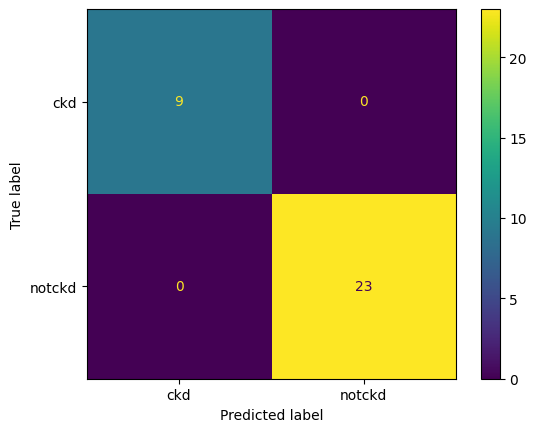

In [84]:
!pip install scikit-learn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



# Generate predictions
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()